## Introductory Lab - Basic Python



## Part 1: Basic setup and libraries
First, set up the notebook and import functions from the current assignment file _basics.py_.

In [5]:
# commands for the jupyter notebook to autoreload external imports
# such as function that you will write in te basics.py file (imported here)
%load_ext autoreload
%autoreload 2
from basics import *

### NumPy

NumPy is a library for the Python programming language, adding support for
large, multi-dimensional arrays and matrices, along with a large collection
of high-level mathematical functions to operate on these arrays.

**If you are unfamiliar with NumPy**, please start with [NumPy
Quickstart](https://numpy.org/doc/stable/user/quickstart.html) or [Numpy
Introduction](https://www.w3schools.com/python/numpy/numpy_intro.asp) or
tutorial according to [your preference](https://letmegooglethat.com/?q=How+to+start+with+numpy).

Although NumPy has a `matrix` class, we will not be using that. Instead, we
will use the `array` class for representing matrices, vectors, images, lists,
etc. 

We will import numpy using:

In [1]:
import numpy as np

### PyPlot
PyPlot `matplotlib.pyplot` is a collection of functions for figures creation and plotting. The matplotlib is designed to work similar to MATLAB - [PyPlot Introduction](https://matplotlib.org/stable/tutorials/pyplot.html).


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### What to Avoid?

Try to **avoid loops** for numeric operations. Loops are slow in a pure
Python. Instead, try to find a NumPy alternative. 

Look at the following example of a simple mean (average) computation with loops and with
the NumPy function, think about the speed and also about code readability.

In [3]:
import time as t

# generate (1000000,5) random numbers from -5 to 10 (uniform distribution)
M = np.random.uniform(low=-5.0, high=10.0, size=(1000000, 5))

# solution using loops
t1 = t.time()
H, W = M.shape
M_sum_loop = np.zeros((W, ), dtype=float)
for i in range(W):
    current_sum = 0.0
    for j in range(H):
        current_sum += M[j,i]
    M_sum_loop[i] = current_sum / H
t2 = t.time()
print(M_sum_loop)
print(f'Loop time: {t2 - t1:.3f} seconds')

# solution using numpy
t1 = t.time()
M_sum_numpy = np.mean(M, axis=0)
t2 = t.time()
print(M_sum_numpy)
print(f'Numpy time: {t2 - t1:.3f} seconds')

[2.502668   2.50474668 2.49913465 2.49317195 2.50386521]
Loop time: 2.799 seconds
[2.502668   2.50474668 2.49913465 2.49317195 2.50386521]
Numpy time: 0.036 seconds


### Useful NumPy functions

You may find the following function useful for this and future assignments. For full list of functions read the [documentation](https://numpy.org/doc/stable/reference/index.html).

* np.array(), np.shape(), np.dot(), np.mean(), np.sum(), **np.cumsum()**
* np.min(), np.max(), **np.argmin(), np.argmax()**, np.amin(), np.amax()
* **np.sort(), np.argsort()**
* **np.concatenate(), np.squeeze(), np.flatten(), np.expand_dims()**
* **np.stack()**, np.vstack(), np.hstack(), np.dstack()
* np.logical_and(), np.logical_not(), np.logical_or()
* np.linspace(), np.histogram(), np.meshgrid()
* **.shape, .astype(), np.reshape()**
* np.kron(), np.tile()
* np.unique()
* **np.linalg.norm()**
* and many others

## Part 2: Matrix manipulation with NumPy
In the first part of assignment, we will start with some simple matrix manipulation tasks.

Our goal is to complete a function `output = matrix_manip(A, B)`, where `A` and
`B` are input matrices (represented by `np.array`). The **matrix_manip** function
should return a Python `dict` containing the results of the operations:

1. Find the transpose of the matrix `A` and return it in `output['A_transpose']`. 
2. Select the third column of the matrix `A` and return it in `output['A_3rd_col']`.
      - **Hint**: Don't forget Python and NumPy use 0-based indexing. Make sure your output dimensions are correct!
3. Select the last two rows from the last three columns of the matrix `A` and return the matrix in `output['A_slice']`.
4. Find all positions in `A` greater then 3 and increment them by 1. Afterwards add a new column of ones to the matrix (from right). Save the result to `output['A_gr_inc']`.
      - **Hint**: Try `>` operator on the whole matrix. The output `dtype` should be the same as the input `dtype`. Some NumPy functions do not make copies of the inputs, but return 'views' of the input arrays instead. Make sure you don't corrupt the other results when computing `output['A_gr_inc']`.
5. Create matrix `C` such that $C_{i,j} = \sum_{k=1}^n A\_gr\_inc_{i,k} \cdot (A\_gr\_inc^T)_{k,j}$ and store it in `output['C']`.
      - **Hint**: No loops are needed, use an appropriate NumPy matrix function. Try it on a paper with a 2×2 matrix if not sure.
6. Compute $\sum_{c=1}^n c \cdot \sum_{r=1}^m A\_gr\_inc_{r,c}$ and store it in `output['A_weighted_col_sum']`.
      - **Hint**: Look at `np.arange` and `np.sum`. Finally convert the output to Python float (as indicated in the docstring) by calling `float(...)`
7. Subtract a vector $(4, 6)^T$ from all columns of matrix `B`. Save the result to matrix `output['D']`
      - **Hint**: NumPy broadcasting.
8. Select all column vectors in the matrix `D`, which have greater [euclidean length](https://en.wikipedia.org/wiki/Euclidean_length) than the average length of column vectors in `D`. Store the results in `output['D_select']`

Your function should work on general input matrices, not
only for the `A` and `B` shown here or for matrices with the same dimensions.
To have some data to work with, lets use the following matrices `A` and `B`
and your results should be:

In [14]:
# initialize data
A = np.array([[16,  2,  3, 13],
              [ 5, 11, 10,  8],
              [ 9,  7,  6, 12],
              [ 4, 14, 15,  1]])

B = np.array([[ 3, 4, 9, 4, 3, 6, 6, 2, 3, 4],
              [ 9, 2,10, 1, 4, 3, 7, 1, 3, 5]])

In [41]:
# run your function
def matrix_manip(A,B):
    output={}
    output['A_transpose'] = np.transpose(A)
    output['A_3rd_col'] = A[:,[2]]  #start from index 0
    output['A_slice']= A[2:, 1:]   #Select the last two rows from the last three columns of the matrix A
    
    #-----point 4-----
    tmp_A = np.copy(A)
    tmp_A[tmp_A > 3] += 1
    ones_col = np.ones((A.shape[0], 1)).astype(A.dtype)
    tmp_A = np.hstack((tmp_A, ones_col))
    output['A_gr_inc'] = tmp_A
    #----end point 4-----
    
    
    
    
    return output

output = matrix_manip(A,B)
print(output)


{'A_transpose': array([[16,  5,  9,  4],
       [ 2, 11,  7, 14],
       [ 3, 10,  6, 15],
       [13,  8, 12,  1]]), 'A_3rd_col': array([[ 3],
       [10],
       [ 6],
       [15]]), 'A_slice': array([[ 7,  6, 12],
       [14, 15,  1]]), 'A_gr_inc': array([[17,  2,  3, 14,  1],
       [ 6, 12, 11,  9,  1],
       [10,  8,  7, 13,  1],
       [ 5, 15, 16,  1,  1]])}


In [37]:
tmp=A.copy()
tmp[tmp>3]+1

array([17, 14,  6, 12, 11,  9, 10,  8,  7, 13,  5, 15, 16])

In [ ]:
output = matrix_manip(A,B)

for k, v in output.items():
    print(f"{k}:\n{v}\n")

# test outputs
np.testing.assert_equal(output['A_transpose'], 
                        np.array([[16,  5,  9,  4],
                               [ 2, 11,  7, 14],
                               [ 3, 10,  6, 15],
                               [13,  8, 12,  1]]), 
                        "The matrix transpose is incorrect!") 

np.testing.assert_equal(output['A_3rd_col'],
                        np.array([[ 3], [10], [ 6], [15]]),
                        "The 3rd column is incorrect!")

np.testing.assert_equal(output['A_slice'],
                        np.array([[ 7,  6, 12],
                               [14, 15,  1]]), 
                        "The slice is incorrect!")

np.testing.assert_equal(output['A_gr_inc'], 
                        np.array([[17,  2,  3, 14,  1],
                               [ 6, 12, 11,  9,  1],
                               [10,  8,  7, 13,  1],
                               [ 5, 15, 16,  1,  1]]), 
                        "The increment of the elements > 3 is incorrect!")

np.testing.assert_equal(output['C'], 
                        np.array([[499, 286, 390, 178],
                               [286, 383, 351, 396],
                               [390, 351, 383, 296],
                               [178, 396, 296, 508]]), 
                        "Matrix C is incorrect!")

assert output['A_weighted_col_sum']==391, "Weighted column sum is incorrect"

np.testing.assert_equal(output['D'],
                        np.array([[-1,  0,  5,  0, -1,  2,  2, -2, -1,  0],
                               [ 3, -4,  4, -5, -2, -3,  1, -5, -3, -1]]), 
                        "Column substraction is incorrect!")

np.testing.assert_equal(output['D_select'],
                        np.array([[ 0,  5,  0, -2],
                               [-4,  4, -5, -5]]),
                        "Column selection based on eucledian length is incorrect!")

## Part 3: Simple data tasks in Python

In this part of the assignment, you are will work with a simple input
data which contains images of letters. We will use similar data structures
later on during the labs. 

The following variables are stored in the `data_33rpz_basics.npz` data file:

- images (3D array of 2000 10×10 grayscale images)
- alphabet (letters contained in the images, not full alphabet is included)
- labels (indexes of the images into Alphabet array).


### Load and visualise the data

After loading the data, have a look at the image with the montage function supplied in the template.

**Hint**: Try to use `%matplotlib notebook` after importing matplotlib.

In [6]:
loaded_data = np.load("data_33rpz_basics.npz")
alphabet = loaded_data["alphabet"]
images = loaded_data["images"]
labels = loaded_data["labels"]

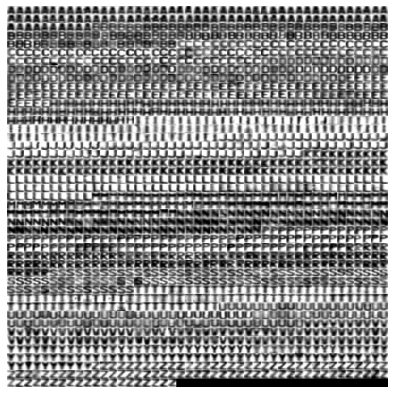

In [7]:
plt.figure(figsize=(7, 7))
plt.imshow(montage(images), cmap='gray')
plt.show()

### Letter mean

Complete the function **`compute_letter_mean`**. For a given letter in the alphabet, compute its mean image. In another words, take all images in the dataset displaying that letter, and compute their pixel-wise mean.
   
**Use your name initials** (if present in the dataset) and save them as `initial1_mean.png` and `initial2_mean.png` (use any letter if any of your initials is not present in the dataset). 
  
**Round the mean image to integers** and return it in the `uint8` type.

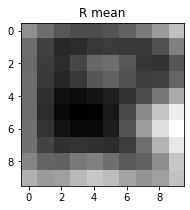

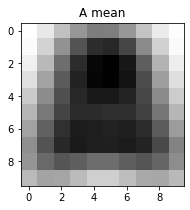

In [8]:
from PIL import Image

initial_char1 = "R"
initialMean1 = compute_letter_mean(initial_char1, alphabet, images, labels)
Image.fromarray(initialMean1, mode='L').save("initial1_mean.png")

initial_char2 = "A"
initialMean2 = compute_letter_mean(initial_char2, alphabet, images, labels)
Image.fromarray(initialMean2, mode='L').save("initial2_mean.png")

plt.figure(figsize=(3, 3))
plt.title(initial_char1 + " mean")
plt.imshow(initialMean1, cmap='gray')

plt.figure(figsize=(3, 3))
plt.title(initial_char2 + " mean")
plt.imshow(initialMean2, cmap='gray')
plt.show()

In [9]:
# interactive demo for letter mean visualization
plot_letter_mean_interactive(alphabet, images, labels)

interactive(children=(Dropdown(description='letter', index=13, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J'…

### Simple visual feature

Complete the function for the feature computation **`compute_lr_features`**. It should compute the features (from images) for all occurrences of a given letter. For a single image, the feature is defined as:
```
x = sum of pixel values in the left half of image - sum of pixel values in the right half of image
```
You may think of it as a simple 1D representation of the multi-dimensional image.

**Warning**: The images are stored in unsigned type (uint8), make sure to convert the values to suitable signed type before doing the subtraction, e.g. `np.int32(sum_left) - np.int32(sum_right)`.

For reference the following feature vector was computed for letter A:

In [10]:
letter_char = 'A'
lr_features = compute_lr_features(letter_char, alphabet, images, labels)
np.testing.assert_equal(lr_features,
                        np.array([  120 , 1223 , -144 , -161 ,  197 , -2921 , -998 , -944 , -120 , -304 , -884 ,-1461 ,
                                   -1233,  1444,  1705,  1332,   881,    212,    92,   319, -3104, -2829,   255,     1,
                                   -1763,  2230,  1916,  -335,  -257,  -3568, -5204, -1144,  -641,   525,   182,  -768,
                                    -844,  1536,  1139,   522,   495,    353,  -251,  1345,   439,  1114, -2087,  -107,
                                    -563,  1491, -1935, -1640,  1979,   2215,   906,  1726,  1332,   365,   825,  2776,
                                    1282,   708,  1010,   429,  1141,   1145,  1896,     7,  -642,  -657,    36,   368,
                                    1079,    79,  -483,   327,  -135,    888,  2270,  2211,  3860,  1248,  1371,  -857,
                                     100,  -134,  -946,  1954,  1979,  -1575,  -837,  1363,   803,   546, -1916, -1808,
                                     370,  -435,  -363,   497]),
                        "The lr_features are incorrect!")

### Feature histogram

Plot a histograms of the feature values computed from your initials over the whole dataset into one figure. You should see the difference for two different letters.
Save the figure as `initials_histograms.png`. 

The code for plotting the histograms is already prepared for you in `plot_letter_feature_histogram(features_1, features_2, letters)`. 

Look at the generated histogram image. Do the histogram plots make sense? Could you recognize the letter only by looking at its `lr_histogram`?

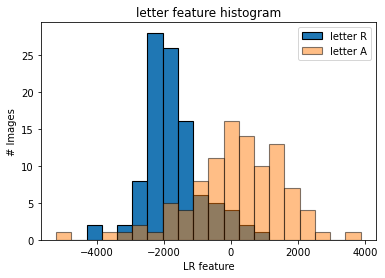

In [11]:
features_1 = compute_lr_features(initial_char1, alphabet, images, labels)
features_2 = compute_lr_features(initial_char2, alphabet, images, labels)
plot_letter_feature_histogram(features_1, features_2, [initial_char1, initial_char2], n_bins=20)
plt.savefig("initials_histograms.png")

In [12]:
# interactive demo for letter histogram visualization
plot_letter_feature_histogram_interactive(alphabet, images, labels)

interactive(children=(Dropdown(description='letterA', index=13, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J…

## Submission to the BRUTE Upload System

To fulfill this assignment, you need to submit these files (all packed in one ''.zip'' file) into the __[upload system](https://cw.felk.cvut.cz/brute/)__:

  - **`basics.ipynb`** - a script for data initialisation, calling of the implemented functions and plotting of their results (for your convenience, will not be checked).
  - **`basics.py`** - file with implemented methods:
    - **`matrix_manip`** - a method implementing the matrix manipulation tasks specified in the section 1.3 Matrix manipulation
    - **`compute_letter_mean`** and **`compute_lr_features`** - methods specified in the section 1.4 Simple data task 
  - **`initial1_mean.png`**, **`initial2_mean.png`** and **`initials_histograms.png`** - images specified in the section 1.4 Simple data task

When preparing a zip file for the upload system, **do not include any directories**, the files have to be in the zip file root.